# Corrección, modelo y ruido blanco

In [1]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Descriptiva

In [6]:
data(austres)
austres

,Qtr1,Qtr2,Qtr3,Qtr4
1971,,13067.3,13130.5,13198.4
1972,13254.2,13303.7,13353.9,13409.3
1973,13459.2,13504.5,13552.6,13614.3
1974,13669.5,13722.6,13772.1,13832.0
1975,13862.6,13893.0,13926.8,13968.9
1976,14004.7,14033.1,14066.0,14110.1
1977,14155.6,14192.2,14231.7,14281.5
1978,14330.3,14359.3,14396.6,14430.8
1979,14478.4,14515.7,14554.9,14602.5
1980,14646.4,14695.4,14746.6,14807.4


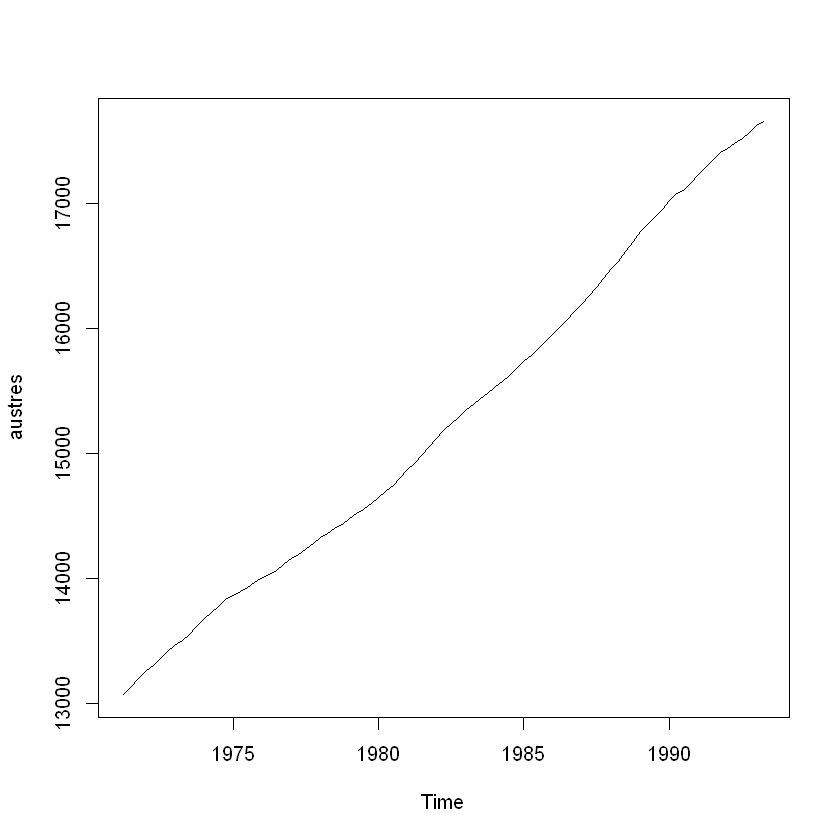

In [7]:
plot(austres)

El gráfico muestra tendencia, serie NO estacionaria.

#### Tendencia

In [8]:
summary(lm(austres~time(austres)))


Call:
lm(formula = austres ~ time(austres))

Residuals:
    Min      1Q  Median      3Q     Max 
-160.35  -99.39  -11.51  111.63  151.21 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.999e+05  3.480e+03  -114.9   <2e-16 ***
time(austres)  2.094e+02  1.756e+00   119.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.4 on 87 degrees of freedom
Multiple R-squared:  0.9939,	Adjusted R-squared:  0.9939 
F-statistic: 1.423e+04 on 1 and 87 DF,  p-value: < 2.2e-16


La serie muestra tendencia lineal. **No estacionaria en media**

#### Estacionariedad en Varianza

In [9]:
adf.test(austres, alternative = 'stationary')


	Augmented Dickey-Fuller Test

data:  austres
Dickey-Fuller = -2.5512, Lag order = 4, p-value = 0.3493
alternative hypothesis: stationary


La serie NO es estacionaria en varianza.
**La serie es NO estacionaria**

## Correcciones
### Correccion 1

In [10]:
austres
diff(austres) # Aplicar las diferencias

,Qtr1,Qtr2,Qtr3,Qtr4
1971,,13067.3,13130.5,13198.4
1972,13254.2,13303.7,13353.9,13409.3
1973,13459.2,13504.5,13552.6,13614.3
1974,13669.5,13722.6,13772.1,13832.0
1975,13862.6,13893.0,13926.8,13968.9
1976,14004.7,14033.1,14066.0,14110.1
1977,14155.6,14192.2,14231.7,14281.5
1978,14330.3,14359.3,14396.6,14430.8
1979,14478.4,14515.7,14554.9,14602.5
1980,14646.4,14695.4,14746.6,14807.4


,Qtr1,Qtr2,Qtr3,Qtr4
1971,,,63.2,67.9
1972,55.8,49.5,50.2,55.4
1973,49.9,45.3,48.1,61.7
1974,55.2,53.1,49.5,59.9
1975,30.6,30.4,33.8,42.1
1976,35.8,28.4,32.9,44.1
1977,45.5,36.6,39.5,49.8
1978,48.8,29.0,37.3,34.2
1979,47.6,37.3,39.2,47.6
1980,43.9,49.0,51.2,60.8


Por ser NO estacionaria en media ni en varianza se aplica diferencias del logaritmo

In [11]:
Correccion1 <- diff(log(austres))

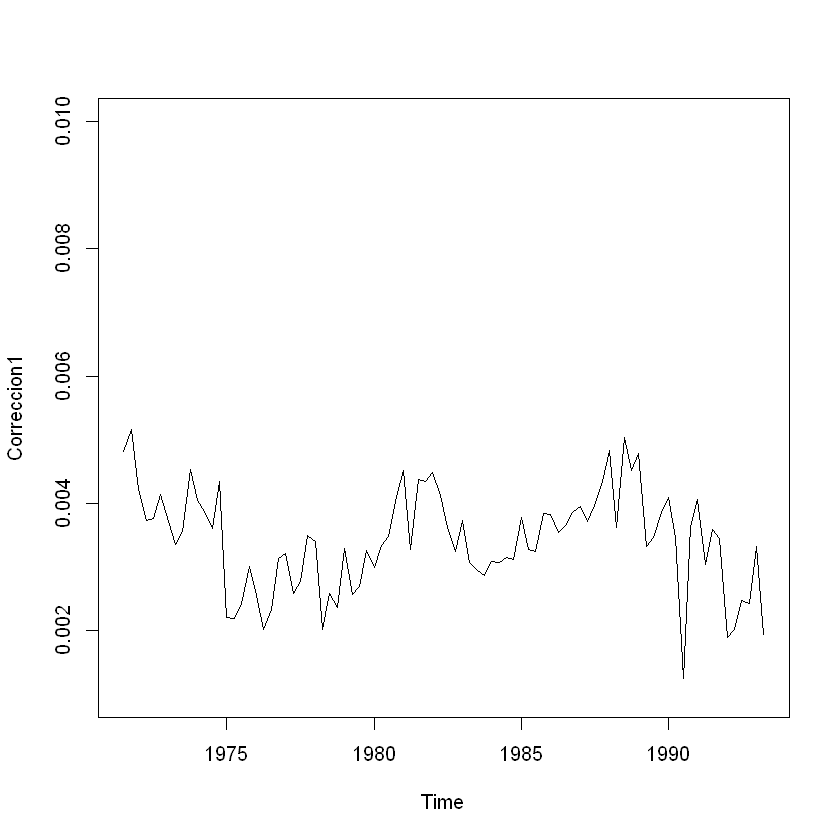

In [14]:
# Plot sin zoom
plot(Correccion1,
    ylim = c(0.001, 0.01))

Revisar que la corrección sea efectiva.

* Se revisa nueva tendencia
* Se revisa estacionariedad en varianza

In [16]:
summary(lm(Correccion1~time(Correccion1)))


Call:
lm(formula = Correccion1 ~ time(Correccion1))

Residuals:
       Min         1Q     Median         3Q        Max 
-2.091e-03 -4.483e-04  4.328e-05  5.093e-04  1.663e-03 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        2.182e-02  2.634e-02   0.828    0.410
time(Correccion1) -9.280e-06  1.329e-05  -0.698    0.487

Residual standard error: 0.0007916 on 86 degrees of freedom
Multiple R-squared:  0.005639,	Adjusted R-squared:  -0.005923 
F-statistic: 0.4877 on 1 and 86 DF,  p-value: 0.4868


No muestra tendencia lineal

In [17]:
adf.test(Correccion1, alternative = 'stationary')


	Augmented Dickey-Fuller Test

data:  Correccion1
Dickey-Fuller = -2.041, Lag order = 4, p-value = 0.5592
alternative hypothesis: stationary


La varianza NO es estacionaria. **La serie NO es estacionaria**

### Corrección 2

In [18]:
Correccion2 <- diff(Correccion1)

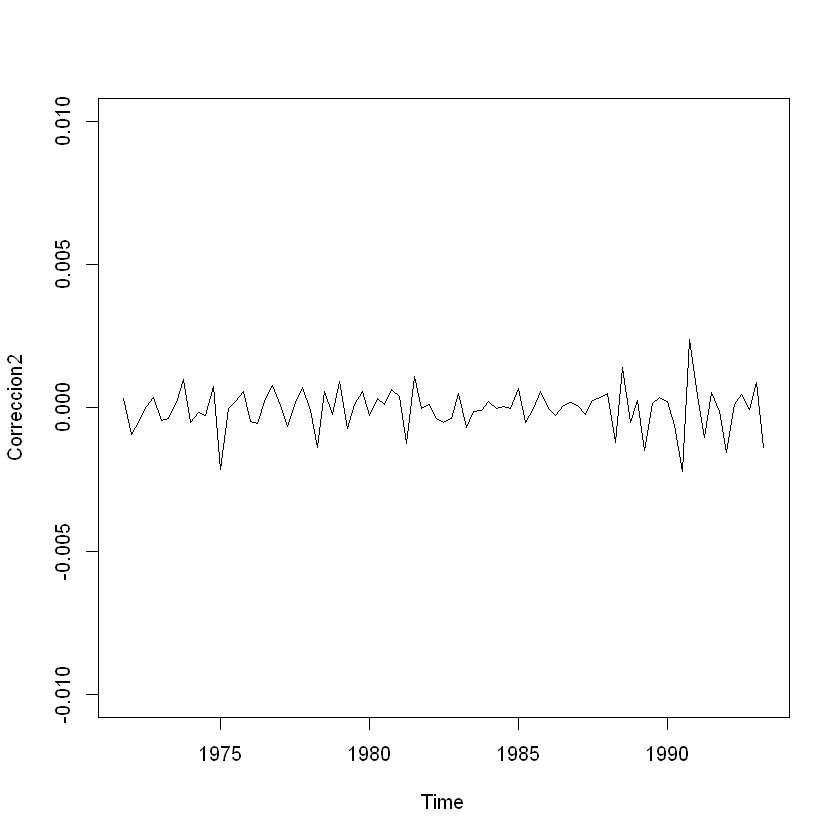

In [21]:
plot(Correccion2,
    ylim = c(-.01, 0.01))

Revisar que la corrección sea efectiva.

* Se revisa nueva tendencia
* Se revisa estacionariedad en varianza

In [22]:
summary(lm(Correccion2~time(Correccion2)))


Call:
lm(formula = Correccion2 ~ time(Correccion2))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0021726 -0.0003672  0.0001008  0.0004134  0.0024242 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        4.290e-04  2.463e-02   0.017    0.986
time(Correccion2) -2.331e-07  1.242e-05  -0.019    0.985

Residual standard error: 0.0007276 on 85 degrees of freedom
Multiple R-squared:  4.14e-06,	Adjusted R-squared:  -0.01176 
F-statistic: 0.0003519 on 1 and 85 DF,  p-value: 0.9851


No muestra tendencia lineal. **Es estacionaria en media**

In [23]:
adf.test(Correccion2, alternative = 'stationary')

Warning message in adf.test(Correccion2, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Correccion2
Dickey-Fuller = -4.3979, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


La varianza es estacionaria. **La correccion 2 es estacionaria**

## Modelado 

#### Modelo AR

In [24]:
ar(Correccion2)


Call:
ar(x = Correccion2)

Coefficients:
      1        2        3  
-0.5043  -0.4332  -0.2603  

Order selected 3  sigma^2 estimated as  4.068e-07

In [25]:
AIC(arima(Correccion2, order = c(3,0,0), method = 'ML'))

[1] -1028.058

#### Modelo MA

In [26]:
aux <- Inf
for(i in 1:15){
    if(AIC(arima(Correccion2, order=c(0,0,i), method = 'ML')) < aux){
        aux <- AIC(arima(Correccion2, order=c(0,0,i), method = 'ML'))
        MA.mejor <- i
    }
}
MA.mejor
aux

[1] 1

[1] -1026.332

#### Modelo ARMA

In [29]:
defaultW <- getOption("warn") 

options(warn = -1) 

In [30]:
arma.aic <- Inf
for(j in 1:10){
    for(i in 1:10){
        if(AIC(arima(Correccion2, order=c(j,0,i), method = 'ML')) < arma.aic){
            arma.aic <- AIC(arima(Correccion2, order=c(j,0,i), method = 'ML'))
            ARMA.mejor <- c(j,i)
        }
    }
}
ARMA.mejor
arma.aic

[1] 2 3

[1] -1036.91

In [31]:
options(warn = defaultW)

## Ruido Blanco

Revisar:

* Ruido blanco de residuales
* Media cero
* Varianza constante

#### Ruido blanco de residuales

In [32]:
Res23 <- residuals(arima(Correccion2, order = c(2,0,3), method = 'ML'))

#### Media

In [35]:
mean(Res23)

[1] -3.803283e-06

#### Varianza Constante

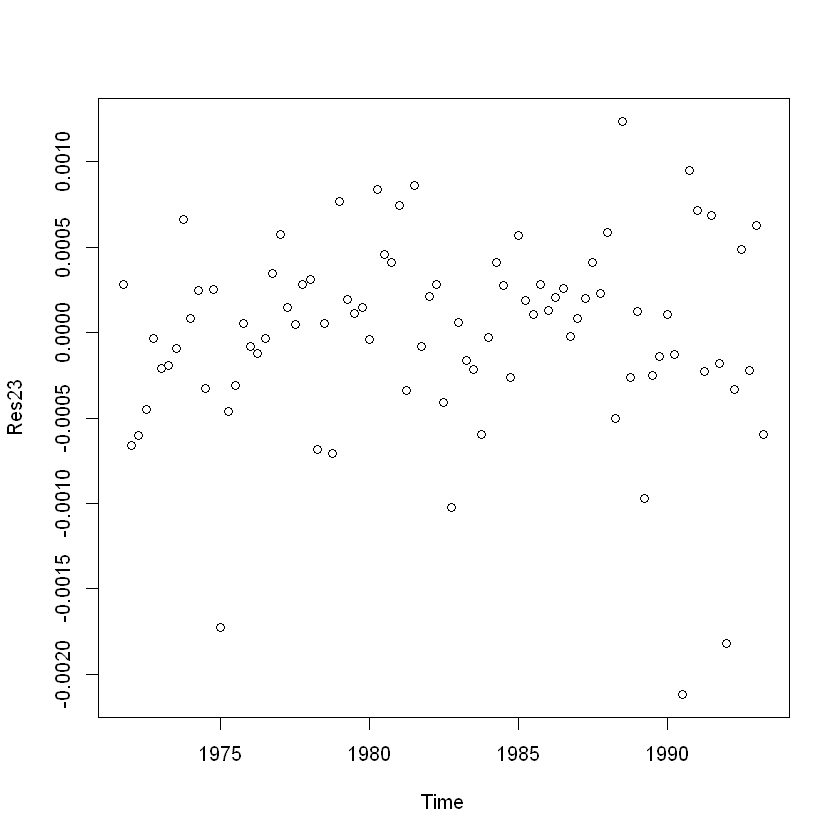

In [36]:
plot(Res23,
    type = 'p')

#### Incorrelacion

**Nota:** Las barras no deben superar la linea azul

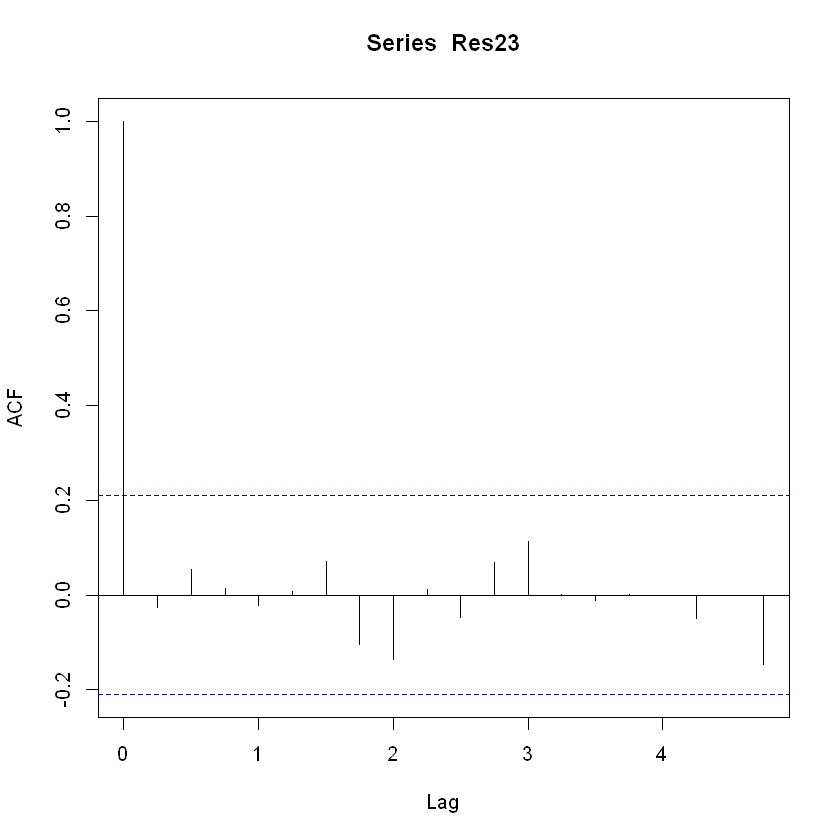

In [37]:
acf(Res23)

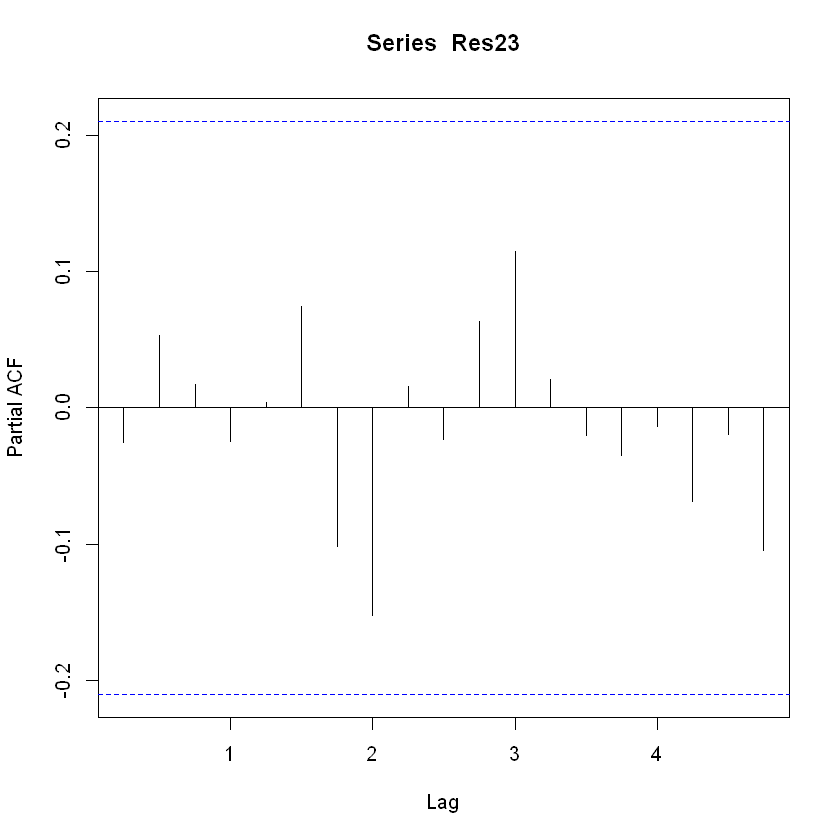

In [38]:
pacf(Res23)

### Prueba analitica

In [39]:
Box.test(Res23)


	Box-Pierce test

data:  Res23
X-squared = 0.056392, df = 1, p-value = 0.8123


No rechazo H0. **Los residuales no muestran independencia**

#### Normailidad

In [40]:
shapiro.test(Res23)


	Shapiro-Wilk normality test

data:  Res23
W = 0.92558, p-value = 9.125e-05


No siguen distribucion normal

**Residuales como ruido blanco. Se puede proceder a predecir**

### Predicciones

* Se debe de escribir en el 2do parametro del orden la cantidad de diferenciaciones usadas.

In [45]:
predict(arima(austres, order = c(2,2,3), method = 'ML'), n.ahead = 20)$pred

Warning message in log(s2):
"Se han producido NaNs"


,Qtr1,Qtr2,Qtr3,Qtr4
1993,,,17699.10,17743.43
1994,17790.79,17831.51,17869.03,17913.13
1995,17960.57,18001.51,18038.96,18082.83
1996,18130.33,18171.51,18208.91,18252.54
1997,18300.09,18341.50,18378.85,18422.25
1998,18469.84,18511.49,,


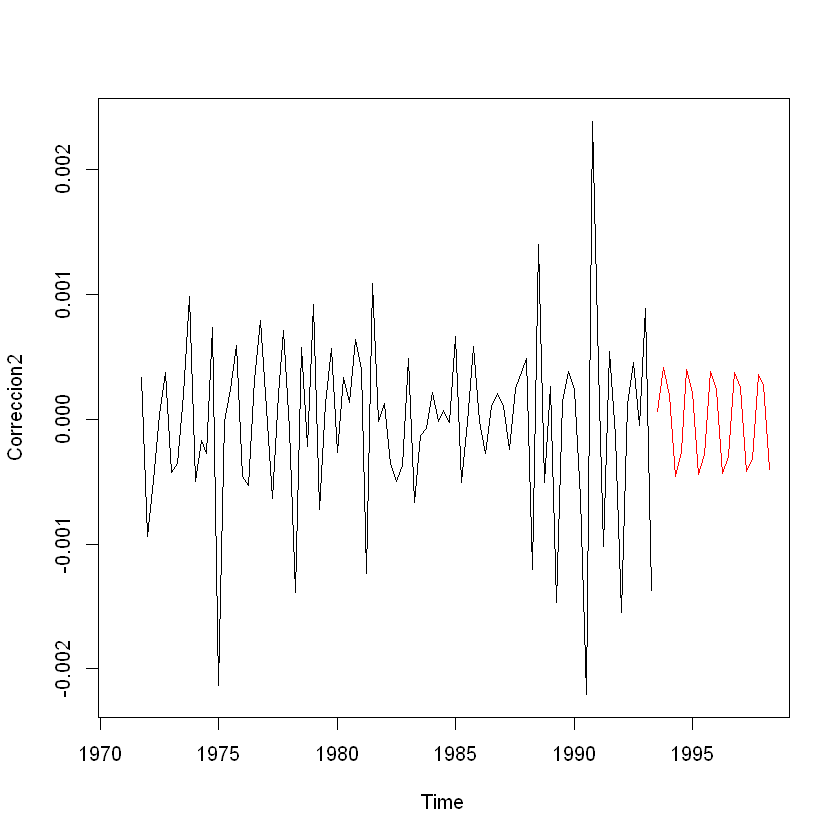

In [53]:
plot(Correccion2,
    xlim = c(1971, 1998))
lines(predict(arima(Correccion2, order = c(2,0,3), method = 'ML'), n.ahead = 20)$pred,
     col = 'red')

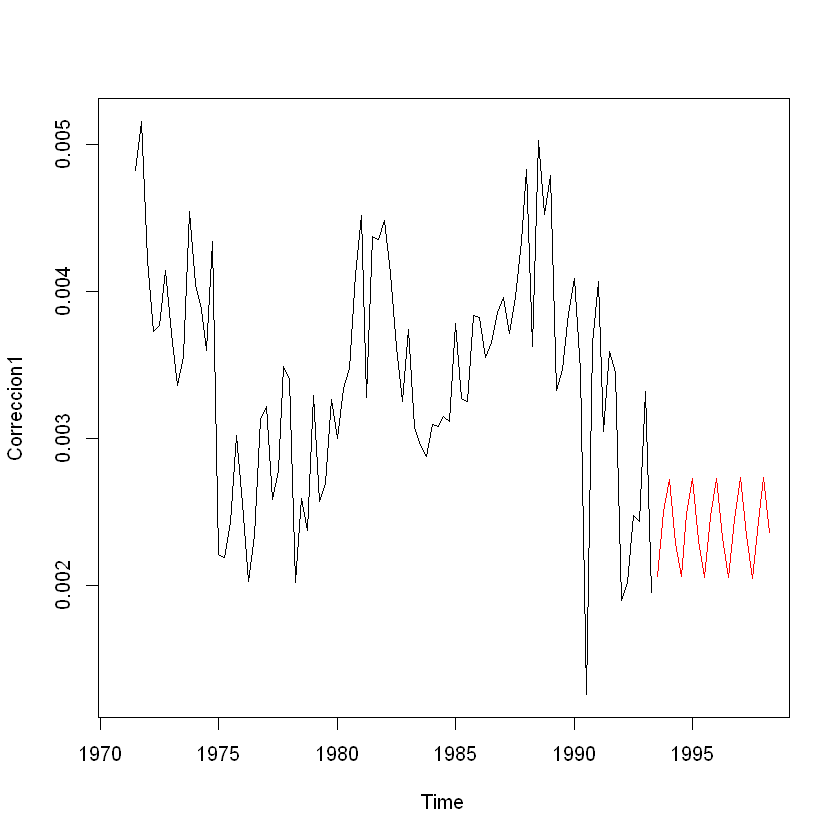

In [54]:
plot(Correccion1,
    xlim = c(1971, 1998))
lines(predict(arima(Correccion1, order = c(2,1,3), method = 'ML'), n.ahead = 20)$pred,
     col = 'red')

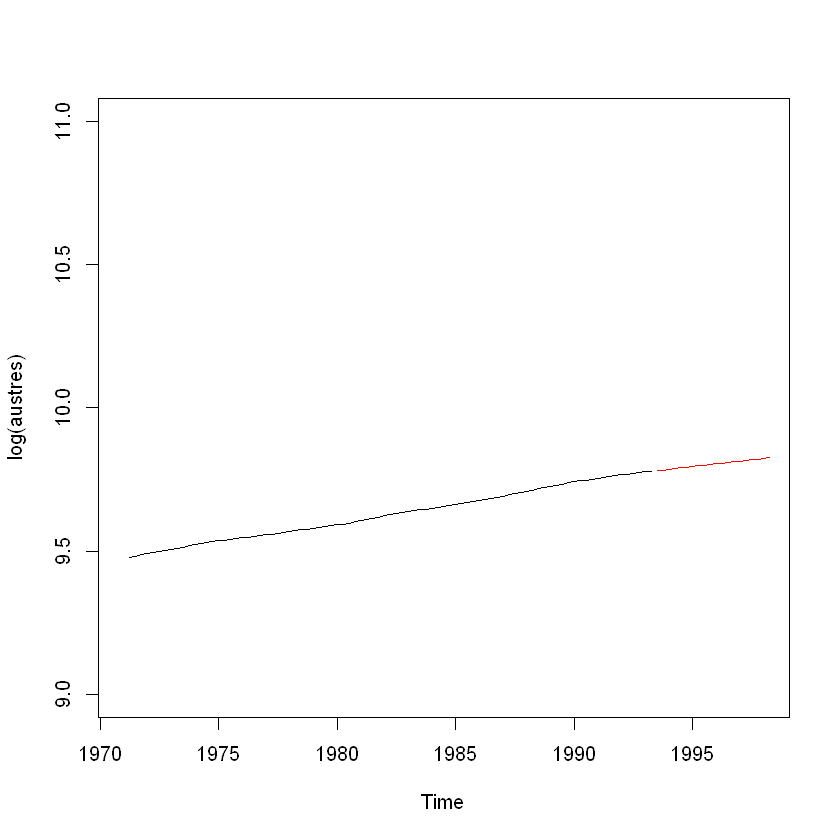

In [55]:
plot(log(austres),
    xlim = c(1971, 1998),
    ylim = c(9,11))
lines(predict(arima(log(austres), order = c(2,2,3), method = 'ML'), n.ahead = 20)$pred,
     col = 'red')

Warning message in log(s2):
"Se han producido NaNs"


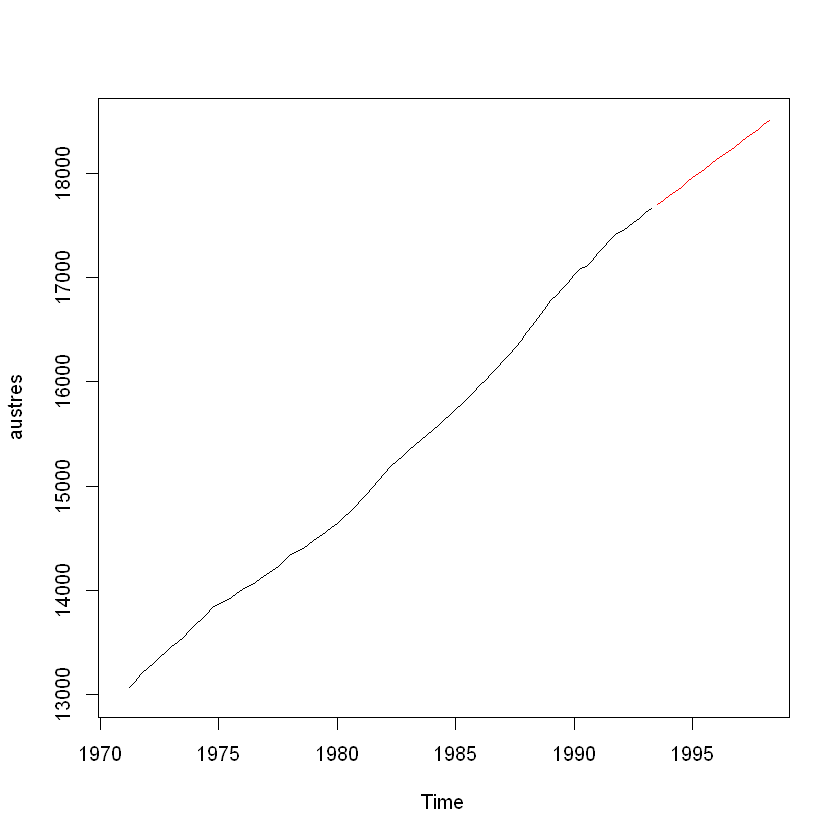

In [61]:
plot(austres,
    xlim = c(1971, 1998),
    ylim = c(13000,18500))
lines(predict(arima(austres, order = c(2,2,3), method = 'ML'), n.ahead = 20)$pred,
     col = 'red')

## El modelo elegido es el ARIMA(2,2,3)